Các thư viện cần thiết


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

Lấy dữ liệu train từ file csv

In [2]:
df=pd.read_csv("heart.csv")


Các dữ liệu trong datasete trừ cột có dữ liệu String

Mô tả Data

In [3]:
df.describe().T

count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

Lọc dữ liệu thành 2 thành phần là dữ liệu kiểu số và chữ

In [4]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


Chuyển đổi dữ liệu của các cột kiểu chữ thành dạng có thể xử lí

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df.copy(deep=True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

Vẽ biểu đồ cột cho các cột dữ liệu kiểu chữ để xem sự phân bố của dữ liệu

Biểu đồ tròn cho kiểu dữ loại loại


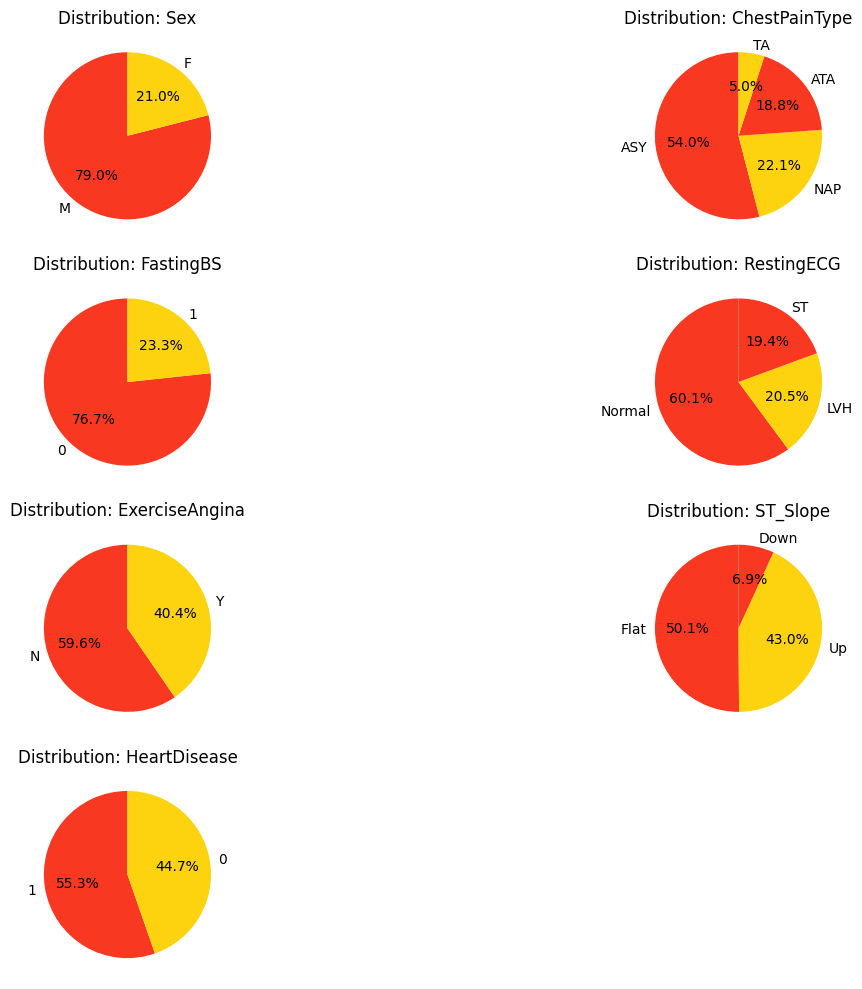

In [6]:
colors = ['#F93822', '#FDD20E']
fig, axes = plt.subplots(nrows=(len(categorical_features) + 1) // 2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    counts = df[feature].value_counts()
    
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    axes[i].set_title('Distribution: ' + feature)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Vẽ biểu đồ cột cho kiểu dữ liệu số để xem sự phân bố của dữ liệu


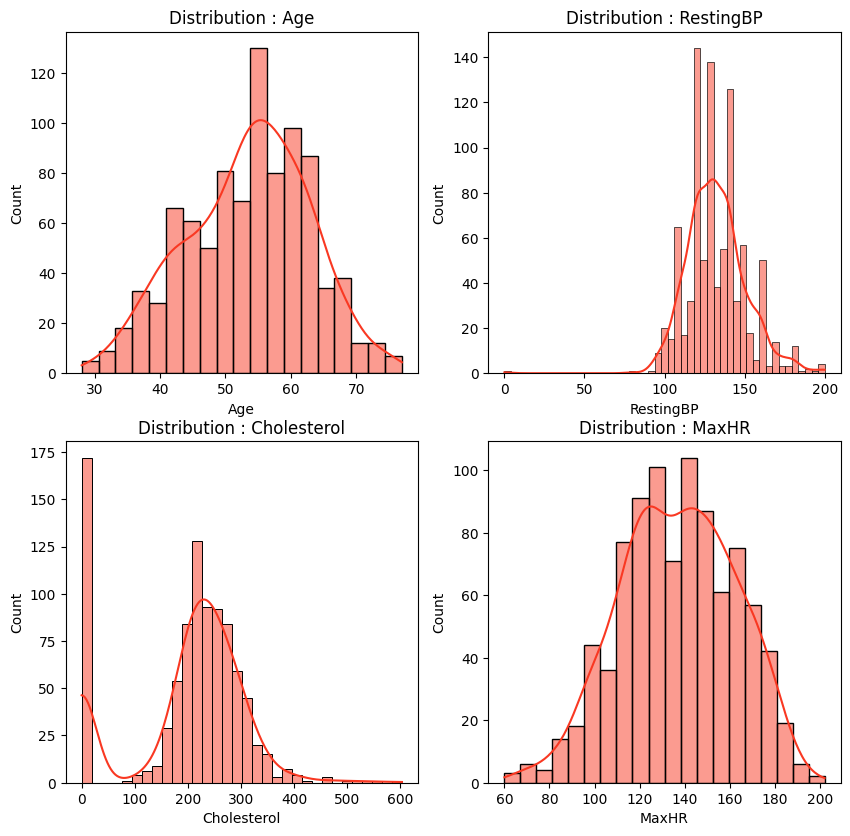

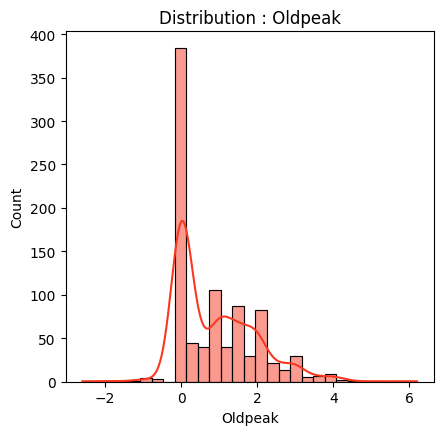

In [7]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.histplot(df1[numerical_features[i]],kde=True,kde_kws = {'bw_adjust' : 1},color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.histplot(df1[numerical_features[len(numerical_features) - 1]],kde=True,kde_kws = {'bw_adjust' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

Phân tích mối quan hệ giữa Bệnh tim và các giá trị kiểu loại



Mối tương quan giữa giá trị dạng cột so với giá trị mục tiêu (biểu đồ cột)

In [8]:
def calculate_percentage(column):
    counts = df[df['HeartDisease'] == 1][column].value_counts()
    percentages = [count / sum(counts) * 100 for count in counts]
    return percentages

# Sử dụng hàm cho các thuộc tính cần tính
sex = calculate_percentage('Sex')
cp = calculate_percentage('ChestPainType')
fbs = calculate_percentage('FastingBS')
restecg = calculate_percentage('RestingECG')
exang = calculate_percentage('ExerciseAngina')
slope = calculate_percentage('ST_Slope')

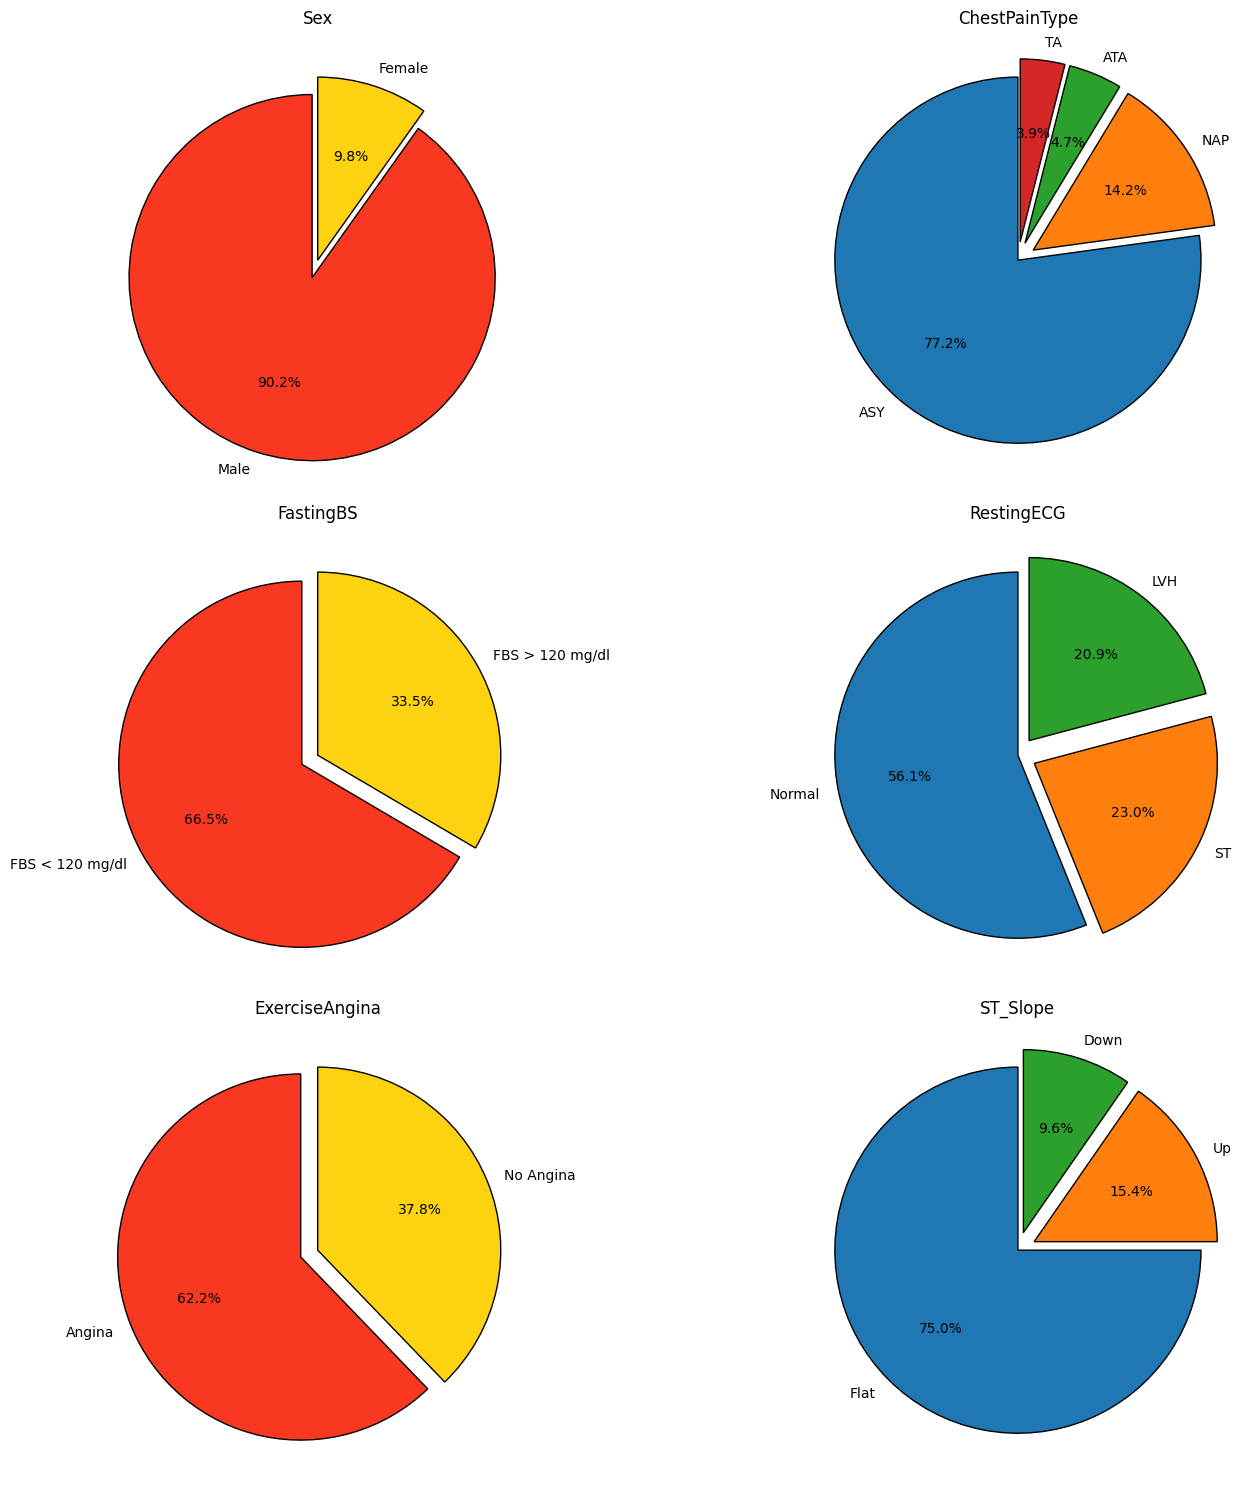

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))  # Tạo khung subplot 3x2

# Tạo biểu đồ pie cho mỗi thuộc tính
ax[0, 0].pie(sex, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
             wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
ax[0, 0].set_title('Sex')

ax[0, 1].pie(cp, labels=['ASY', 'NAP', 'ATA', 'TA'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1, 0.1, 0.1),
             wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
ax[0, 1].set_title('ChestPainType')

ax[1, 0].pie(fbs, labels=['FBS < 120 mg/dl', 'FBS > 120 mg/dl'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0),
             colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
ax[1, 0].set_title('FastingBS')

ax[1, 1].pie(restecg, labels=['Normal', 'ST', 'LVH'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1, 0.1),
             wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
ax[1, 1].set_title('RestingECG')

ax[2, 0].pie(exang, labels=['Angina', 'No Angina'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
             wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
ax[2, 0].set_title('ExerciseAngina')

ax[2, 1].pie(slope, labels=['Flat', 'Up', 'Down'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1, 0.1),
             wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
ax[2, 1].set_title('ST_Slope')

# Điều chỉnh layout để các biểu đồ không bị chồng lấn
plt.tight_layout()
plt.show()


Mối tương quan giữa giá trị dạng số với giá trị mục tiêu


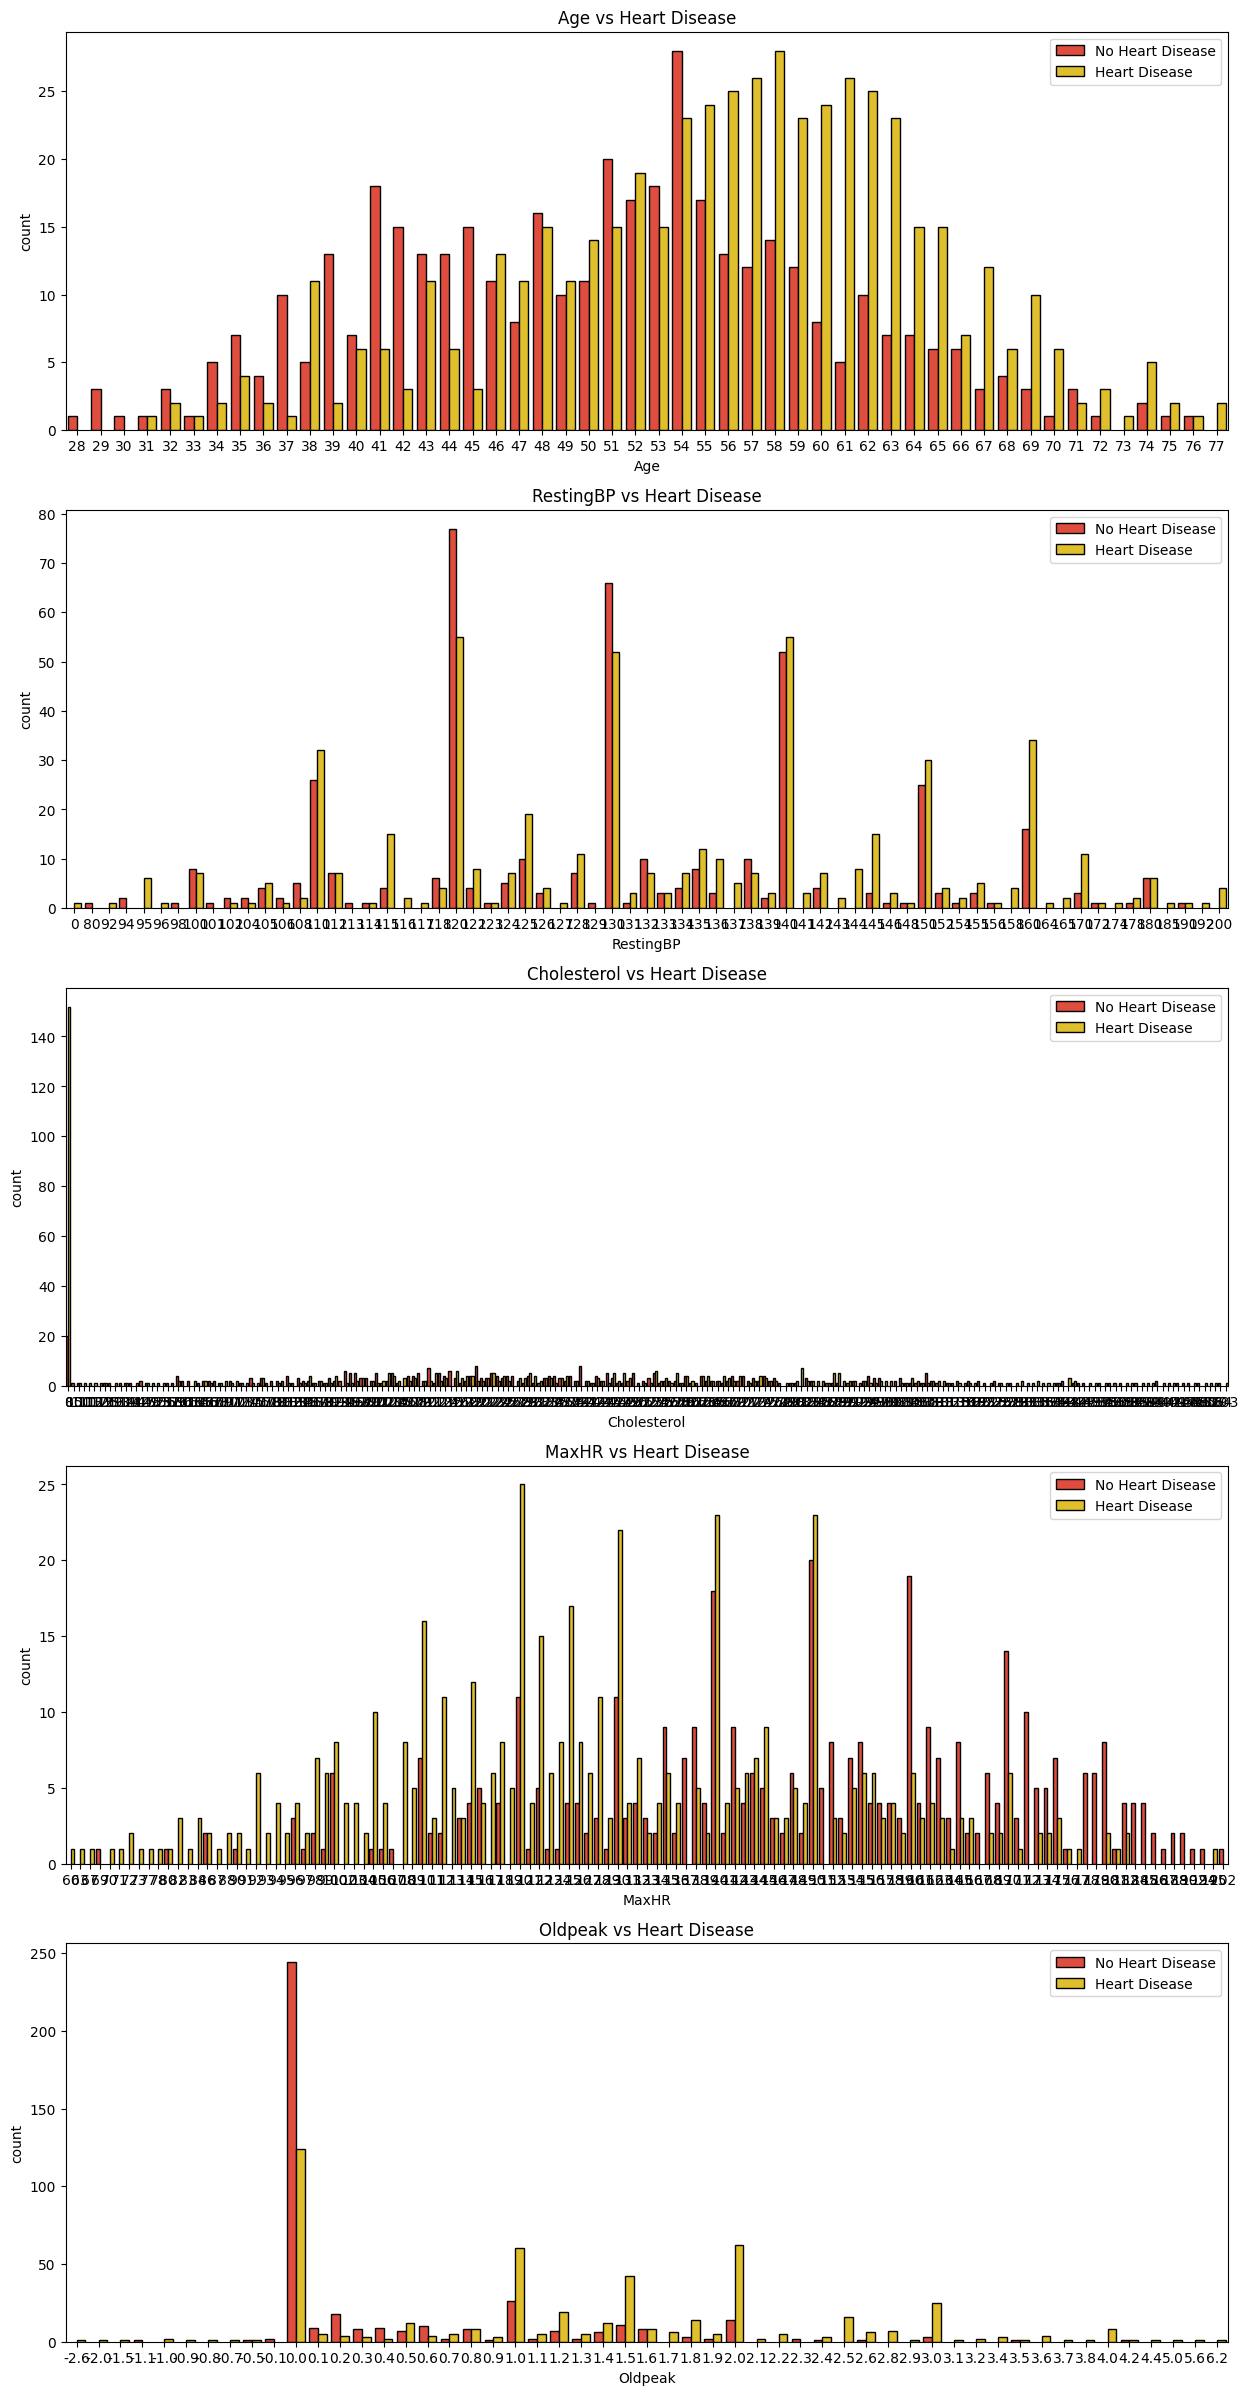

In [10]:
fig, ax = plt.subplots(nrows = 5,ncols = 1,figsize = (15,30))
for i in range(len(numerical_features)):
    plt.subplot(5,1,i+1)
    sns.countplot(x=numerical_features[i],data = df1,hue = "HeartDisease",palette = colors,legend=False, edgecolor = 'black')
    title = numerical_features[i] + ' vs Heart Disease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title)

Băm dữ liệu 

In [11]:
df1['RestingBP_Group'] = [ int(i / 5) for i in df1['RestingBP']]
df1['Cholesterol_Group'] = [ int(i / 10) for i in df1['Cholesterol']]
df1['MaxHR_Group'] = [ int(i / 5) for i in df1['MaxHR']]
df1['Oldpeak_Group'] = [ int( (i*10) / 5) for i in df1['Oldpeak']]

Vẽ lại dữ liệu sao khi đã băm

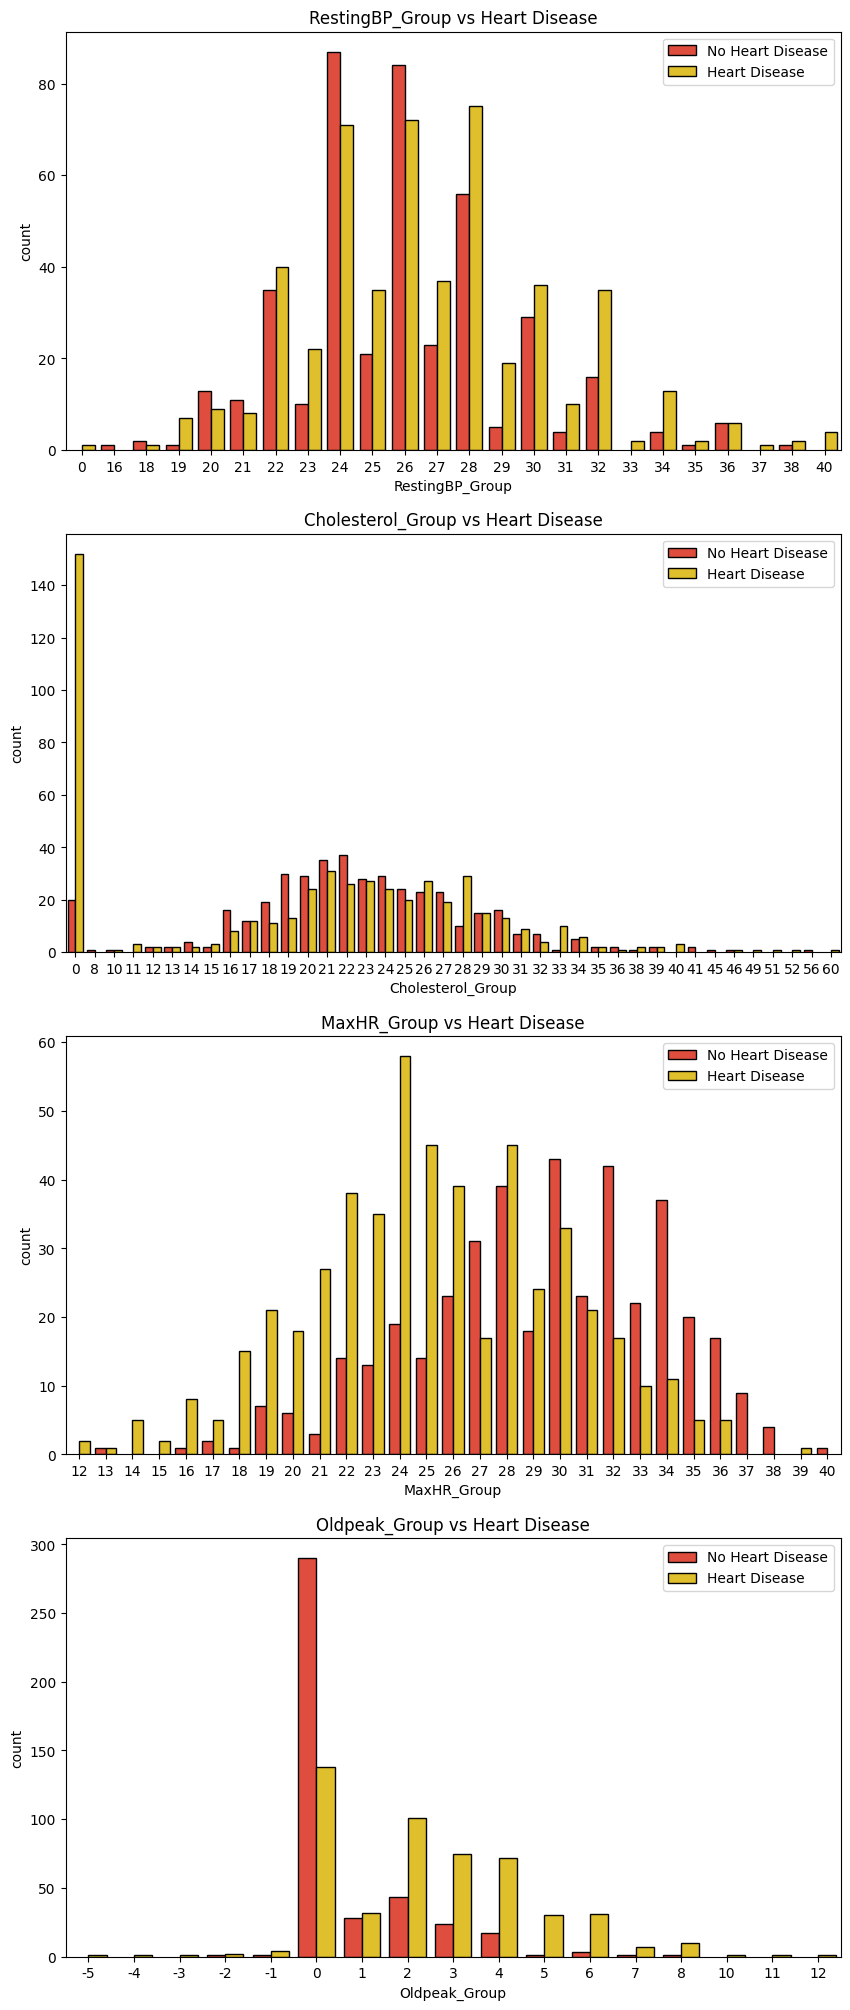

In [12]:
fig, ax = plt.subplots(nrows = 4,ncols = 1,figsize = (10,25))
group_numerical_features = [i + '_Group' for i in numerical_features[1:]]
for i in range(len(group_numerical_features)):
    plt.subplot(4,1,i+1)
    sns.countplot(x=group_numerical_features[i],data = df1,hue = "HeartDisease",palette = colors,legend=False, edgecolor = 'black')
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = group_numerical_features[i] + ' vs Heart Disease'
    plt.title(title);

Giới tính so với các giá trị kiểu số và giá trị mục tiêu

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 19.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 40.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 19.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 60.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarni

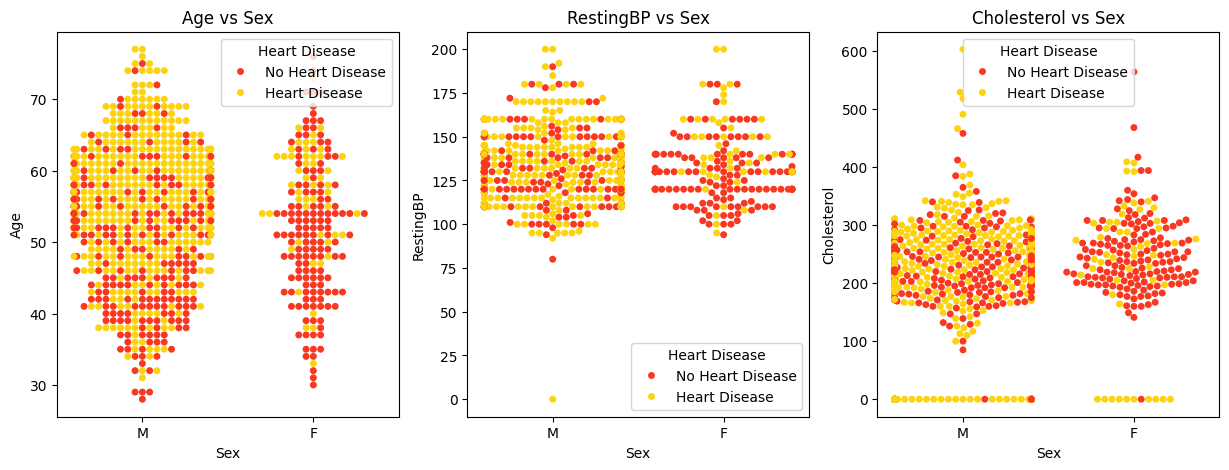

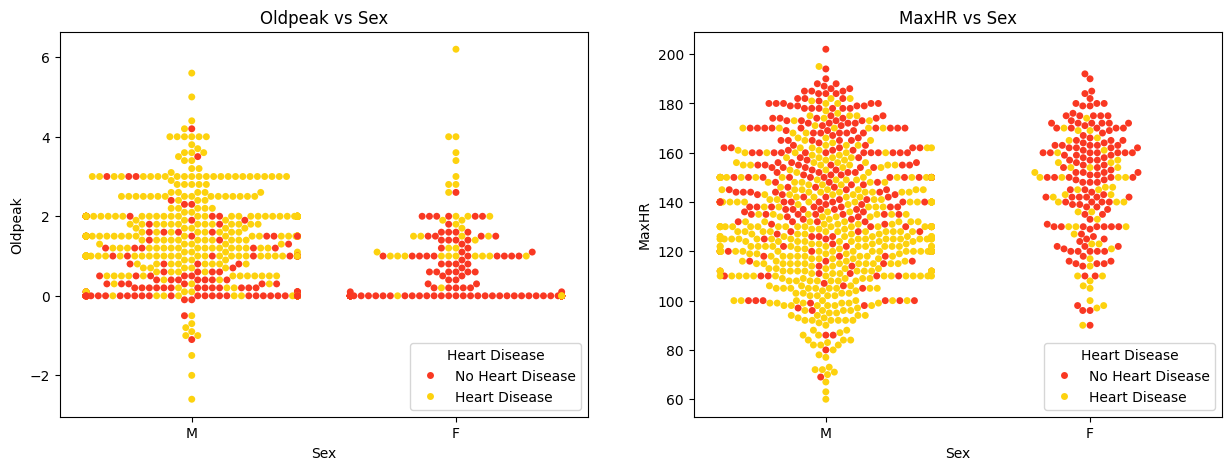

In [13]:
# Tạo đồ thị đầu tiên
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    sns.swarmplot(x='Sex', y=numerical_features[i], data=df, hue='HeartDisease', palette=colors, ax=ax[i])
    ax[i].set_title(f"{numerical_features[i]} vs Sex")
    # Thiết lập tiêu đề và chú thích cho mỗi đồ thị
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles=handles, labels=['No Heart Disease', 'Heart Disease'], title="Heart Disease")

# Tạo đồ thị thứ hai
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for idx, i in enumerate([-1, -2]):
    sns.swarmplot(x='Sex', y=numerical_features[i], data=df, hue='HeartDisease', palette=colors, ax=ax[idx])
    ax[idx].set_title(f"{numerical_features[i]} vs Sex")
    # Thiết lập tiêu đề và chú thích cho mỗi đồ thị
    handles, labels = ax[idx].get_legend_handles_labels()
    ax[idx].legend(handles=handles, labels=['No Heart Disease', 'Heart Disease'], title="Heart Disease")



ChestPainType so với giá trị dạng số

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 32.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 40.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarnin

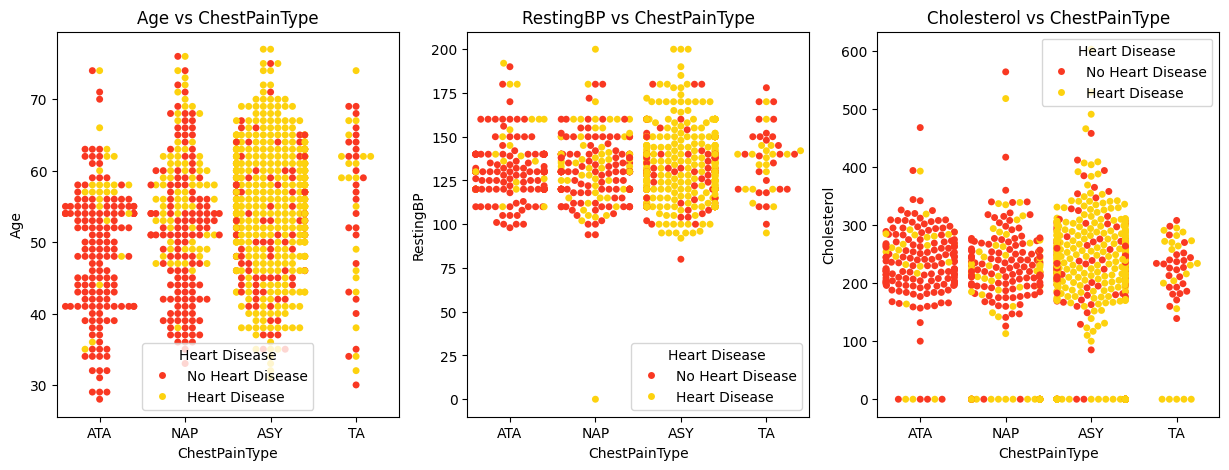

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


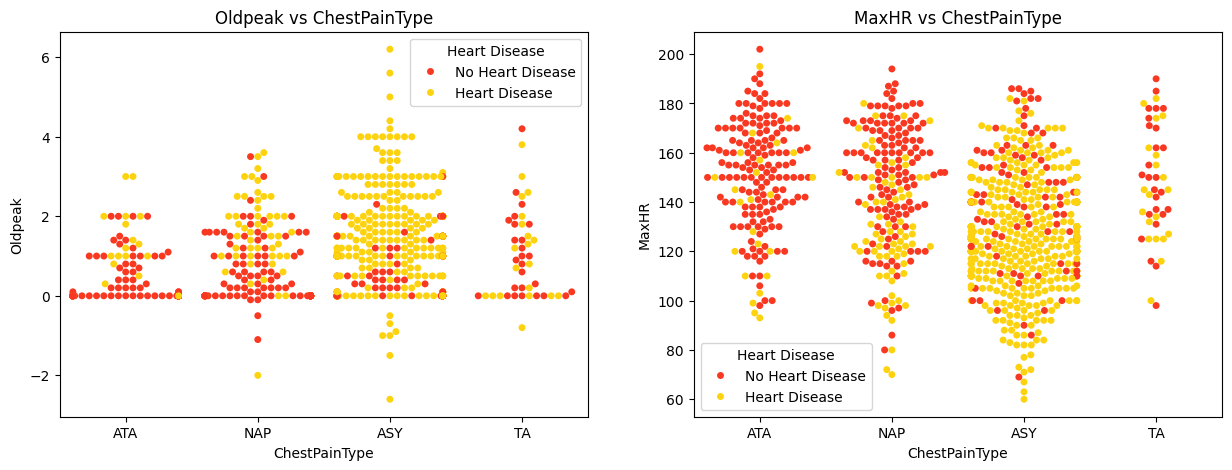

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    sns.swarmplot(x='ChestPainType', y=numerical_features[i], data=df, hue='HeartDisease', palette=colors, ax=ax[i])
    ax[i].set_title(f"{numerical_features[i]} vs ChestPainType")
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles=handles, labels=['No Heart Disease', 'Heart Disease'], title="Heart Disease")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for idx, i in enumerate([-1, -2]):
    sns.swarmplot(x='ChestPainType', y=numerical_features[i], data=df, hue='HeartDisease', palette=colors, ax=ax[idx])
    ax[idx].set_title(f"{numerical_features[i]} vs ChestPainType")
    # Thiết lập tiêu đề và chú thích cho mỗi đồ thị
    handles, labels = ax[idx].get_legend_handles_labels()
    ax[idx].legend(handles=handles, labels=['No Heart Disease', 'Heart Disease'], title="Heart Disease")

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 41.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 59.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarni

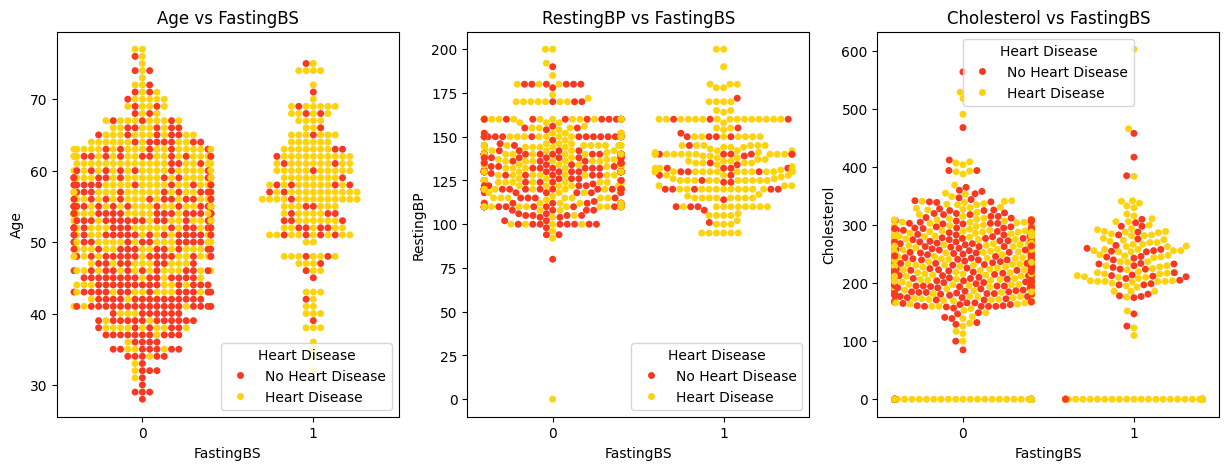

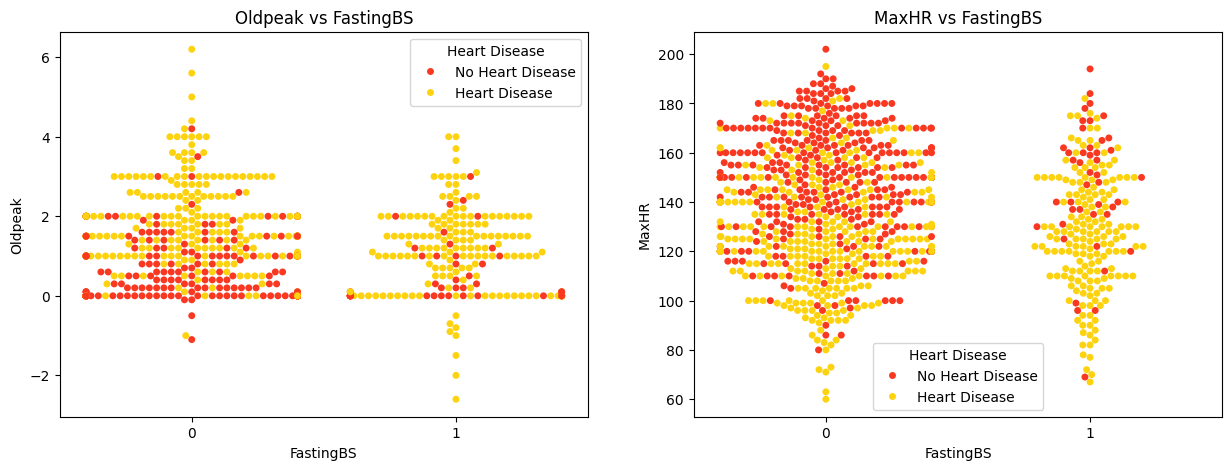

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    sns.swarmplot(x='FastingBS', y=numerical_features[i], data=df, hue='HeartDisease', palette=colors, ax=ax[i])
    ax[i].set_title(f"{numerical_features[i]} vs FastingBS")
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles=handles, labels=['No Heart Disease', 'Heart Disease'], title="Heart Disease")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for idx, i in enumerate([-1, -2]):
    sns.swarmplot(x='FastingBS', y=numerical_features[i], data=df, hue='HeartDisease', palette=colors, ax=ax[idx])
    ax[idx].set_title(f"{numerical_features[i]} vs FastingBS")
    # Thiết lập tiêu đề và chú thích cho mỗi đồ thị
    handles, labels = ax[idx].get_legend_handles_labels()
    ax[idx].legend(handles=handles, labels=['No Heart Disease', 'Heart Disease'], title="Heart Disease")

RestingECG với dữ liệu loại số

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 22.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 55.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 17.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarnin

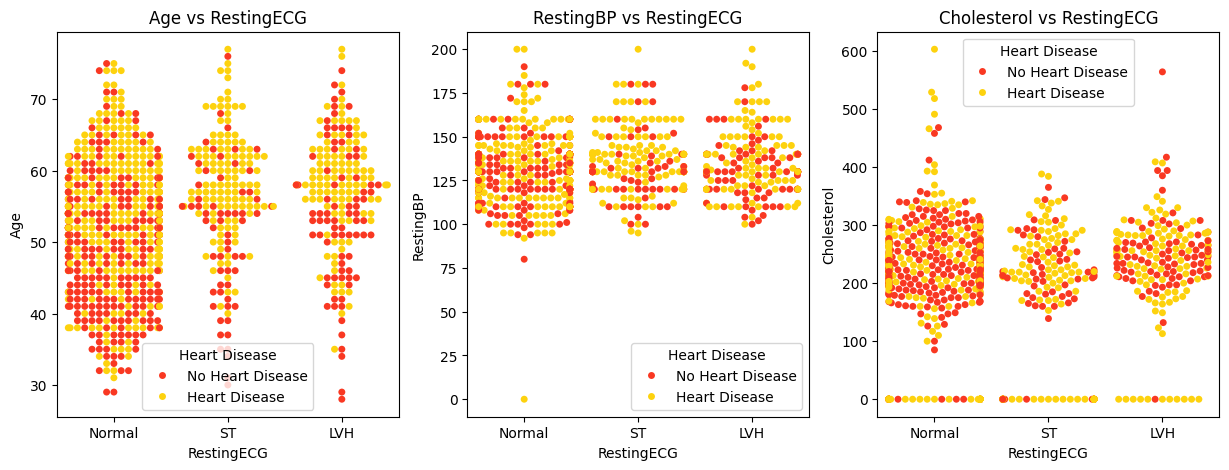

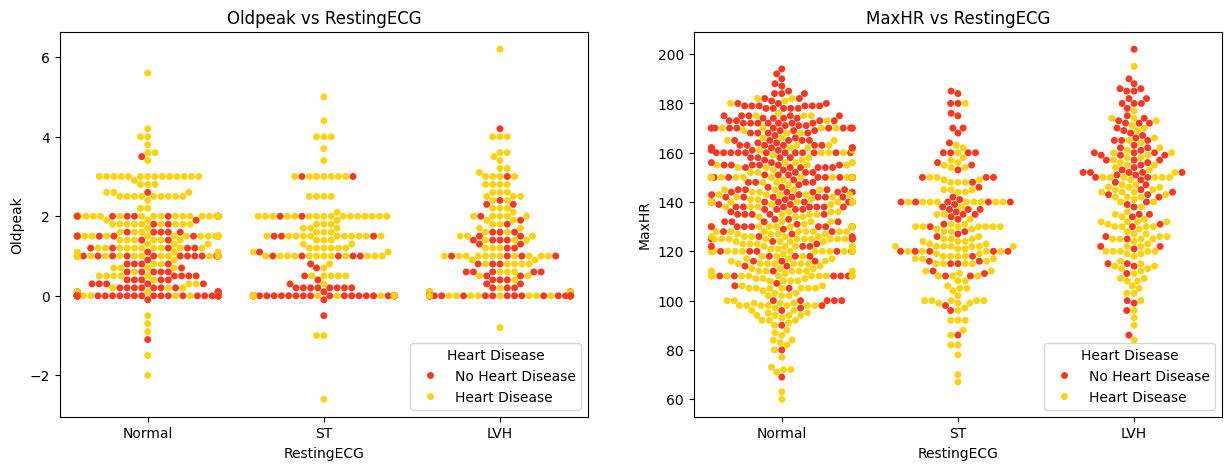

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    sns.swarmplot(x='RestingECG', y=numerical_features[i], data=df, hue='HeartDisease', palette=colors, ax=ax[i])
    ax[i].set_title(f"{numerical_features[i]} vs RestingECG")
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles=handles, labels=['No Heart Disease', 'Heart Disease'], title="Heart Disease")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for idx, i in enumerate([-1, -2]):
    sns.swarmplot(x='RestingECG', y=numerical_features[i], data=df, hue='HeartDisease', palette=colors, ax=ax[idx])
    ax[idx].set_title(f"{numerical_features[i]} vs RestingECG")
    # Thiết lập tiêu đề và chú thích cho mỗi đồ thị
    handles, labels = ax[idx].get_legend_handles_labels()
    ax[idx].legend(handles=handles, labels=['No Heart Disease', 'Heart Disease'], title="Heart Disease")

ExerciseAngina so với dữ liệu số

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 32.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning

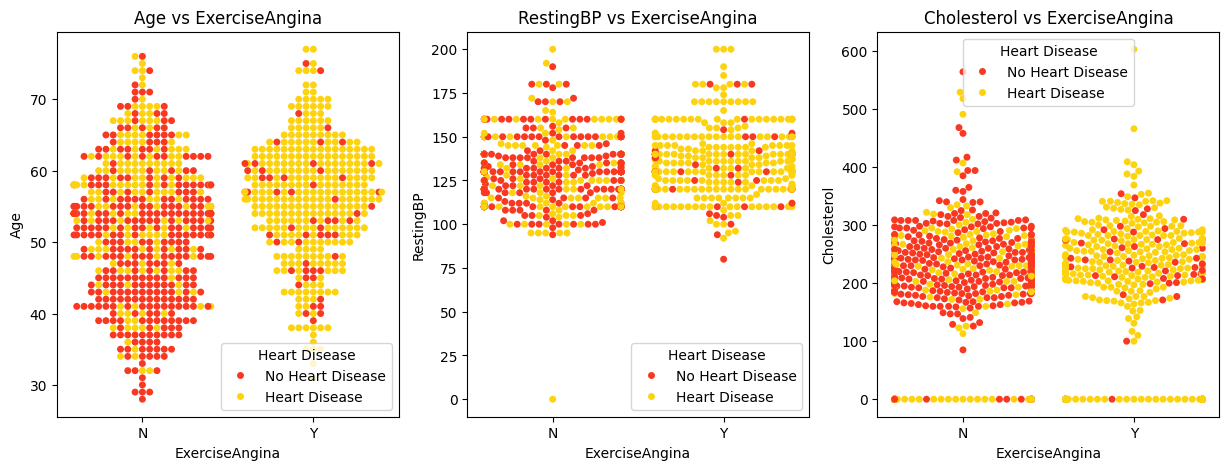

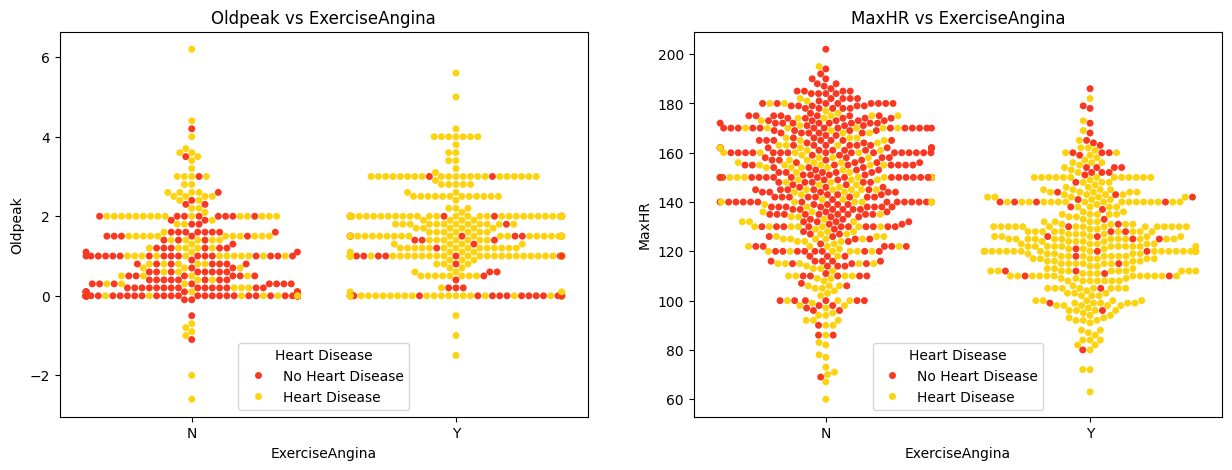

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    sns.swarmplot(x='ExerciseAngina', y=numerical_features[i], data=df, hue='HeartDisease', palette=colors, ax=ax[i])
    ax[i].set_title(f"{numerical_features[i]} vs ExerciseAngina")
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles=handles, labels=['No Heart Disease', 'Heart Disease'], title="Heart Disease")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for idx, i in enumerate([-1, -2]):
    sns.swarmplot(x='ExerciseAngina', y=numerical_features[i], data=df, hue='HeartDisease', palette=colors, ax=ax[idx])
    ax[idx].set_title(f"{numerical_features[i]} vs ExerciseAngina")
    # Thiết lập tiêu đề và chú thích cho mỗi đồ thị
    handles, labels = ax[idx].get_legend_handles_labels()
    ax[idx].legend(handles=handles, labels=['No Heart Disease', 'Heart Disease'], title="Heart Disease")

ST_Slope với các giá trị dạng số

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 19.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 46.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarnin

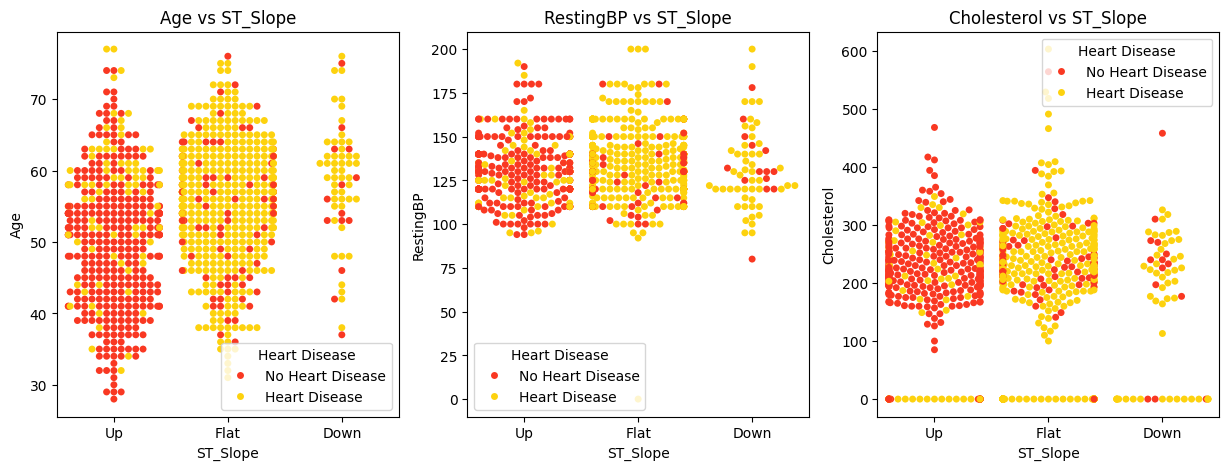

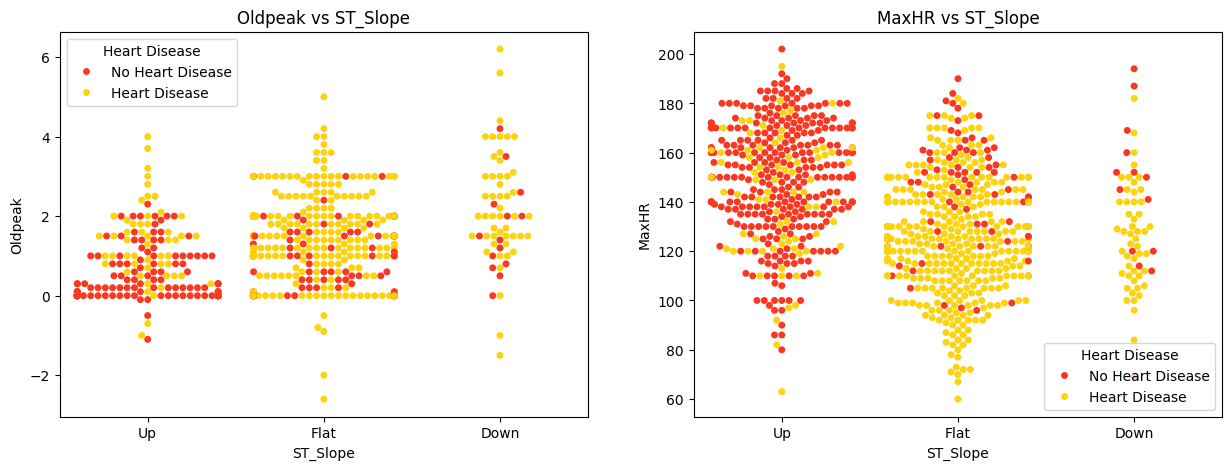

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    sns.swarmplot(x='ST_Slope', y=numerical_features[i], data=df, hue='HeartDisease', palette=colors, ax=ax[i])
    ax[i].set_title(f"{numerical_features[i]} vs ST_Slope")
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles=handles, labels=['No Heart Disease', 'Heart Disease'], title="Heart Disease")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for idx, i in enumerate([-1, -2]):
    sns.swarmplot(x='ST_Slope', y=numerical_features[i], data=df, hue='HeartDisease', palette=colors, ax=ax[idx])
    ax[idx].set_title(f"{numerical_features[i]} vs ST_Slope")
    # Thiết lập tiêu đề và chú thích cho mỗi đồ thị
    handles, labels = ax[idx].get_legend_handles_labels()
    ax[idx].legend(handles=handles, labels=['No Heart Disease', 'Heart Disease'], title="Heart Disease")

Tương quan giữa dữ liệu kiểu số với nhau

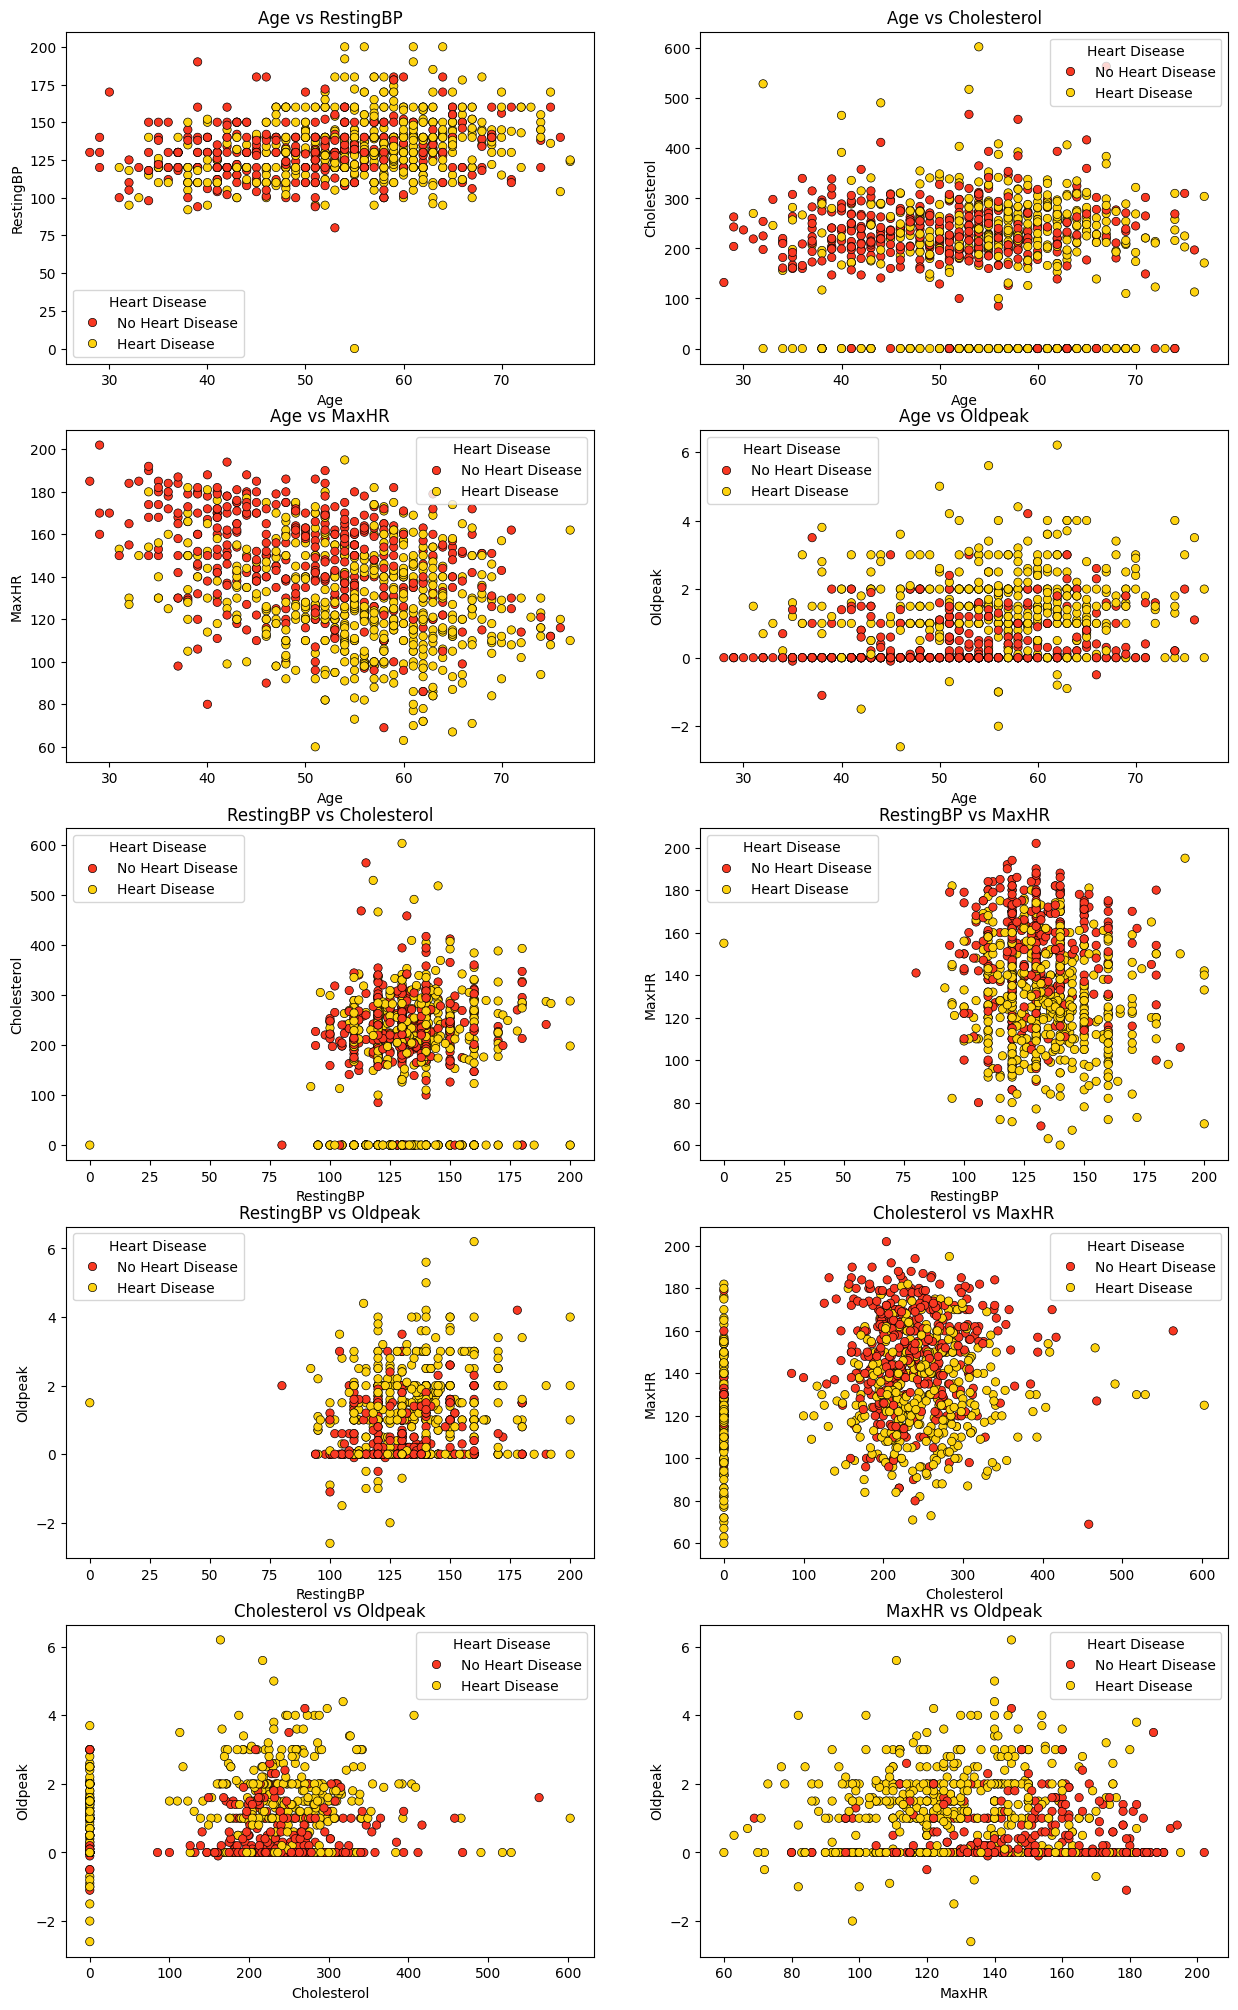

In [19]:
a = 0
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(5, 2, a)
            scatter = sns.scatterplot(
                x=numerical_features[i],
                y=numerical_features[j],
                data=df1,
                hue=df1['HeartDisease'].map({0: 'No Heart Disease', 1: 'Heart Disease'}),
                palette=colors,
                edgecolor='black'
            )
            handles, labels = scatter.get_legend_handles_labels()
            plt.legend(handles=handles, labels=labels, title='Heart Disease')
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)


Ma trận tương quan


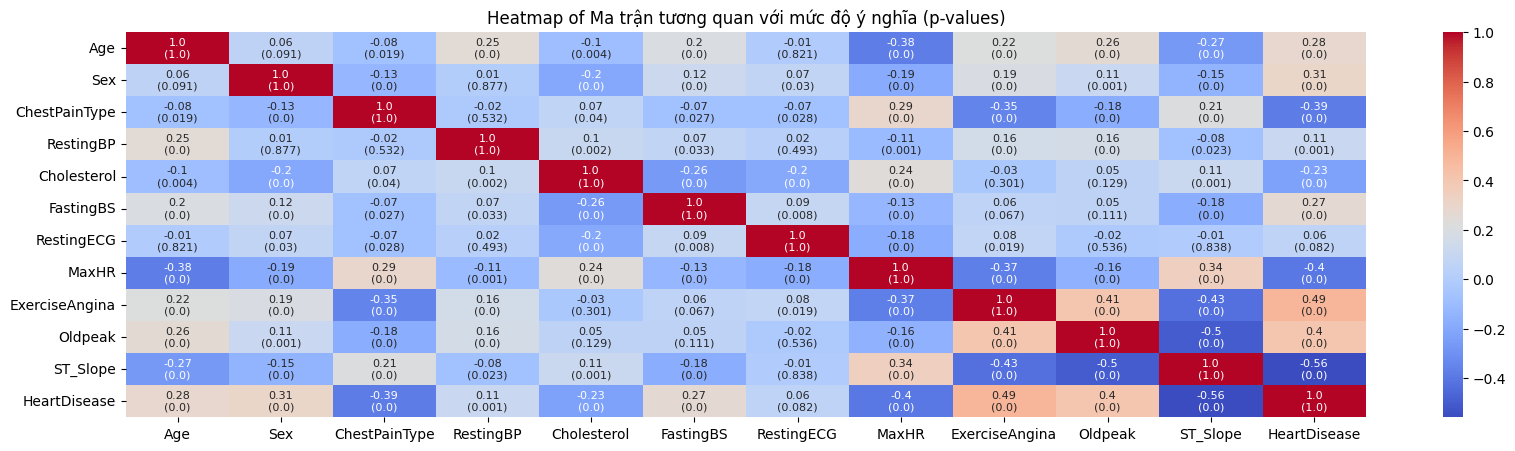

In [20]:
df1 = df1.drop(columns=["RestingBP_Group", "Cholesterol_Group", "MaxHR_Group", "Oldpeak_Group"])
correlation_matrix = df1.corr()
p_value_matrix = pd.DataFrame(np.ones_like(correlation_matrix), columns=df1.columns, index=df1.columns)

for row in df1.columns:
    for col in df1.columns:
        if row != col:
            corr, p_value = pearsonr(df1[row], df1[col])
            p_value_matrix.loc[row, col] = p_value

# Tạo annot để hiển thị cả hệ số tương quan và p-value
annot = correlation_matrix.round(2).astype(str) + "\n(" + p_value_matrix.round(3).astype(str) + ")"

# Vẽ heatmap với annot tùy chỉnh
plt.figure(figsize=(20, 5))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=annot, fmt="", annot_kws={"size": 8})
plt.title("Heatmap of Ma trận tương quan với mức độ ý nghĩa (p-values)")
plt.show()


Chuyển kiểu dữ loại là loại sang nhị phân

In [32]:
# Sao chép DataFrame
df2 = df.copy(deep=True)

# Chuyển các cột phân loại thành dạng nhị phân với tên cụ thể
df2["Sex"]=le.fit_transform(df2["Sex"])
df2["ExerciseAngina"] = le.fit_transform(df2["ExerciseAngina"])
df2 = pd.get_dummies(df2, columns=['ChestPainType'], prefix='', prefix_sep='')
df2 = pd.get_dummies(df2, columns=['RestingECG'], prefix='', prefix_sep='')
df2 = pd.get_dummies(df2, columns=['ST_Slope'], prefix='', prefix_sep='')
print(df2.head())

   Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   40    1        140          289          0    172               0   
1   49    0        160          180          0    156               0   
2   37    1        130          283          0     98               0   
3   48    0        138          214          0    108               1   
4   54    1        150          195          0    122               0   

   Oldpeak  HeartDisease    ASY    ATA    NAP     TA    LVH  Normal     ST  \
0      0.0             0  False   True  False  False  False    True  False   
1      1.0             1  False  False   True  False  False    True  False   
2      0.0             0  False   True  False  False  False   False   True   
3      1.5             1   True  False  False  False  False    True  False   
4      0.0             0  False  False   True  False  False    True  False   

    Down   Flat     Up  
0  False  False   True  
1  False   True  False  
2  False  False  

Ma trận tương quan sau khi đã chuyển cột loại sang dạng nhị phân

In [33]:
categorical_columns=df2.select_dtypes(exclude=[np.number]).columns
for category in (categorical_columns):
    df2[category]=le.fit_transform(df2[category])

print(df2.head())

   Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   40    1        140          289          0    172               0   
1   49    0        160          180          0    156               0   
2   37    1        130          283          0     98               0   
3   48    0        138          214          0    108               1   
4   54    1        150          195          0    122               0   

   Oldpeak  HeartDisease  ASY  ATA  NAP  TA  LVH  Normal  ST  Down  Flat  Up  
0      0.0             0    0    1    0   0    0       1   0     0     0   1  
1      1.0             1    0    0    1   0    0       1   0     0     1   0  
2      0.0             0    0    1    0   0    0       0   1     0     0   1  
3      1.5             1    1    0    0   0    0       1   0     0     1   0  
4      0.0             0    0    0    1   0    0       1   0     0     0   1  


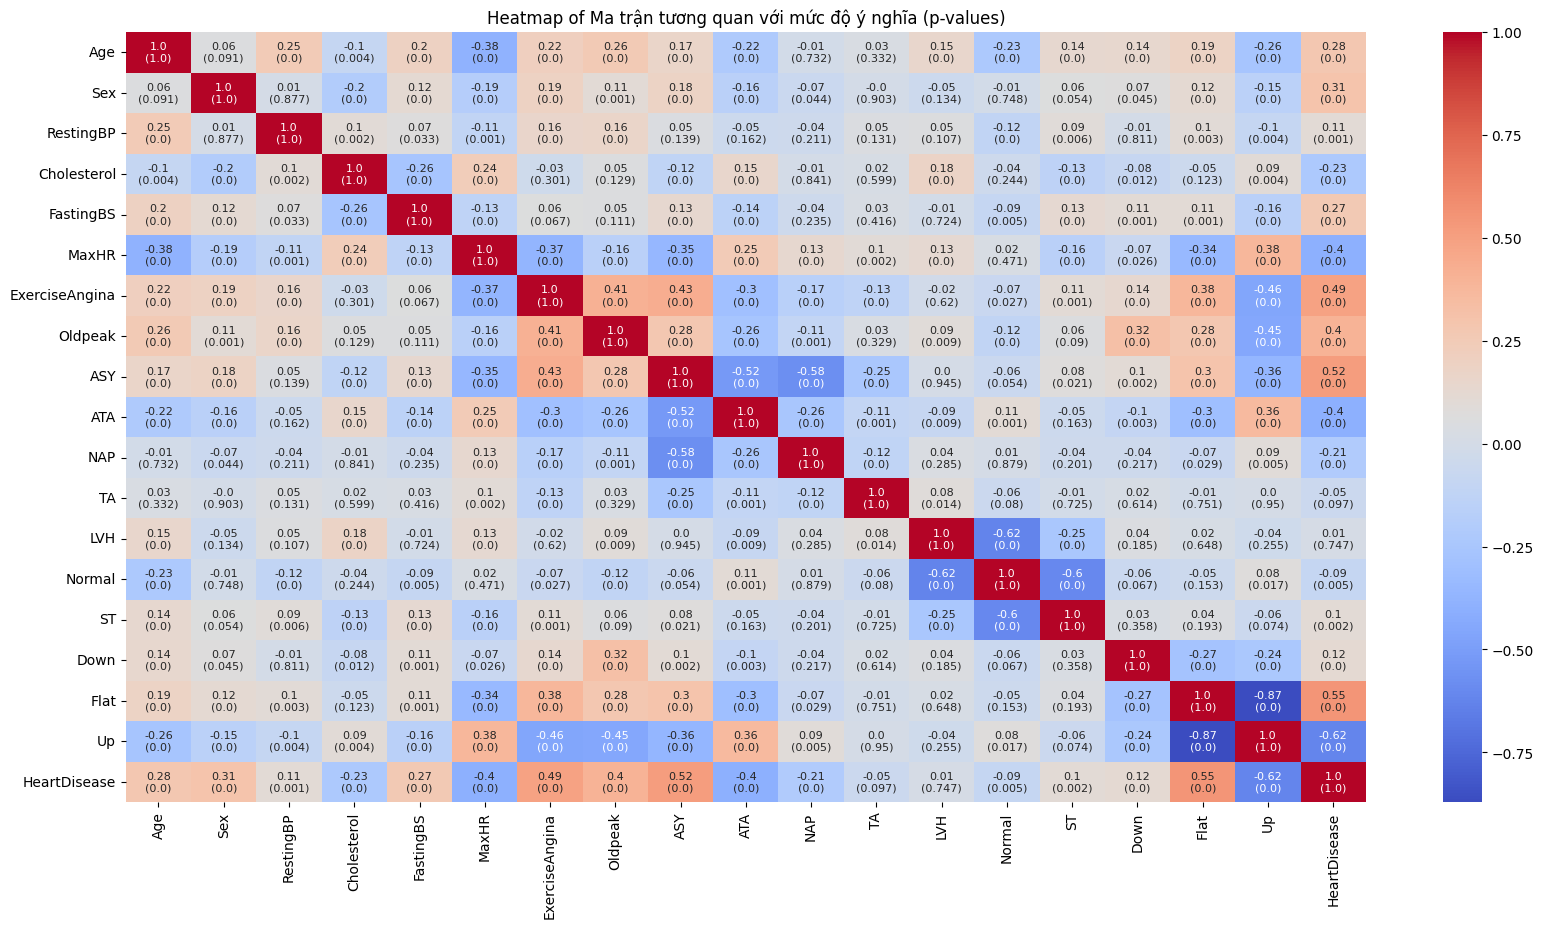

In [34]:
for columns in (df2.columns):
    if columns=="HeartDisease":
        heartDisease=df2[columns]
        df2=df2.drop(columns=columns)
        df2["HeartDisease"]=heartDisease
        break
correlation_matrix = df2.corr()
p_value_matrix = pd.DataFrame(np.ones_like(correlation_matrix), columns=df2.columns, index=df2.columns)

for row in df2.columns:
    for col in df2.columns:
        if row != col:
            corr, p_value = pearsonr(df2[row], df2[col])
            p_value_matrix.loc[row, col] = p_value

# Tạo annot để hiển thị cả hệ số tương quan và p-value
annot = correlation_matrix.round(2).astype(str) + "\n(" + p_value_matrix.round(3).astype(str) + ")"

# Vẽ heatmap với annot tùy chỉnh
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=annot, fmt="", annot_kws={"size": 8})
plt.title("Heatmap of Ma trận tương quan với mức độ ý nghĩa (p-values)")
plt.show()

Xử lí giá trị Null

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [30]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df2['Oldpeak'] = ss.fit_transform(df2[['Oldpeak']])
df2['Age'] = ss.fit_transform(df2[['Age']])
df2['RestingBP'] = ss.fit_transform(df2[['RestingBP']])
df2['Cholesterol'] = ss.fit_transform(df2[['Cholesterol']])
df2['MaxHR'] = ss.fit_transform(df2[['MaxHR']])
print(df2.head())

        Age  Sex  RestingBP  Cholesterol  FastingBS     MaxHR  ExerciseAngina  \
0 -1.433140    1   0.410909     0.825070          0  1.382928               0   
1 -0.478484    0   1.491752    -0.171961          0  0.754157               0   
2 -1.751359    1  -0.129513     0.770188          0 -1.525138               0   
3 -0.584556    0   0.302825     0.139040          0 -1.132156               1   
4  0.051881    1   0.951331    -0.034755          0 -0.581981               0   

    Oldpeak  ASY  ATA  NAP  TA  LVH  Normal  ST  Down  Flat  Up  HeartDisease  
0 -0.832432    0    1    0   0    0       1   0     0     0   1             0  
1  0.105664    0    0    1   0    0       1   0     0     1   0             1  
2 -0.832432    0    1    0   0    0       0   1     0     0   1             0  
3  0.574711    1    0    0   0    0       1   0     0     1   0             1  
4 -0.832432    0    0    1   0    0       1   0     0     0   1             0  
